# Python Image Library (PIL) 

In [2]:
from PIL import Image

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os    ## listing file and handling paths
import copy  ## deep copying arrays and other objects

In [3]:
flist = os.listdir('./')

In [4]:
def getImageList(path='./', fmt = ['jpg', 'png', 'tiff']):
    '''
    (string [,string] ) -> list
    
    Return a list of images having one of given extensions
    by default, searches files with extensions '.jpg', '.png', or '.tiff'
    in the current directory 
    
    Both lower and upper cases are recognized and treated in the same way
    
    
    >>> myImageList1 = getImageList()
    >>> myImageList2 = getImageList('/home/user/photos', ['jpg', 'bmp', 'png', 'tif'])
    >>> print(myImageList1)
        ['./empire.jpg']
    '''
    
    ## check if the input fmt is not empty
    if(len(fmt) <1):
        fmt2 =  ['jpg', 'png', 'tiff']
        
    ## lower the extensions
    else:
        fmt2 = [e.lower() for e in fmt]
    
    return [os.path.join(path, f) for f in os.listdir(path) if f.rsplit('.')[-1].lower() in fmt2  ]

In [5]:
im_list = getImageList()
print(im_list)

['./empire.jpg']


In [6]:
## Let's start with a photo of empire state buiding.
im = Image.open('empire.jpg')

# the size of image can be found like
print("Image size is ", im.size, ' in pixels')

Image size is  (1200, 630)  in pixels


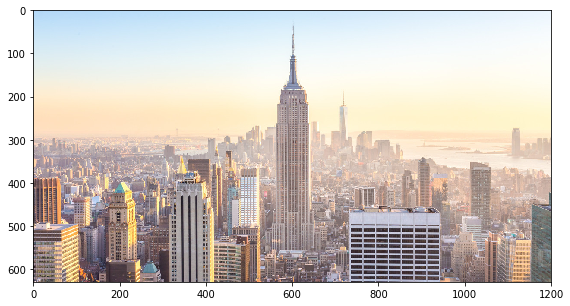

In [7]:
plt.figure(figsize=(10,5))
plt.imshow(im)

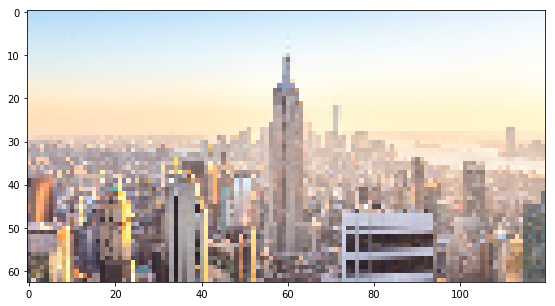

In [8]:
out_small = im.resize((120, 63))
plt.figure(figsize=(10,5))
plt.imshow(out_small)

In [9]:
# Thumbnail

# be careful with thumbnail because it will modify the original image
# If you want to keep the original image, you should make a "DEEP COPY"
# im_copy = im is a shallow copy. 
# Any changes in im_copy will be seen in im.
im_copy = im.copy()  # im_copy = copy.deepcopy(im)
im_copy.thumbnail((64,64))

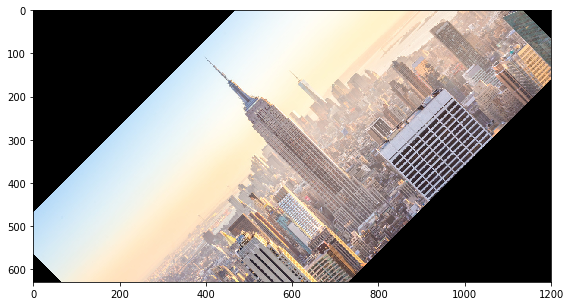

In [10]:
out_rotat = im.rotate(45)
plt.figure(figsize=(10,5))
plt.imshow(out_rotat)

In [11]:
box = (500, 0, 700, 150)
region = im.crop((500, 0, 700, 150))

In [12]:
region_updn = region.transpose(Image.ROTATE_180)

In [13]:
# copy image to make a composite image
im_pasted = copy.deepcopy(im)

# instead of using copy.deepcopy
# you can use 
#    im_pasted = im.copy()

im_pasted.paste(region_updn, box)

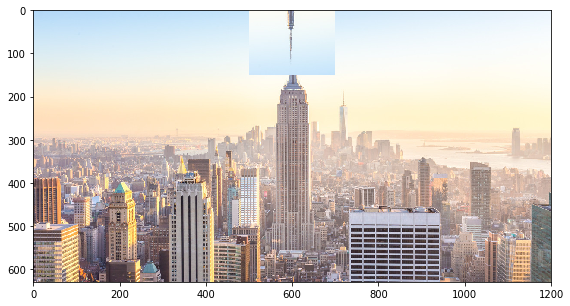

In [14]:
plt.figure(figsize=(10,5))
plt.imshow(im_pasted)

In [15]:
im_data  = im.getdata()

In [16]:
type(im_data)

ImagingCore

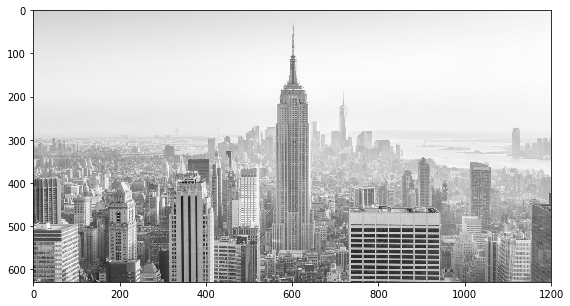

In [17]:
im_gray = im.convert('L')
plt.figure(figsize=(10,5))
plt.imshow(im_gray)

# opencv

In [18]:
import cv2

In [19]:
imcv = cv2.imread('empire.jpg')


In [20]:
print("type of imcv is ", type(imcv))
print("Please note the difference between the type of opencv read and PIL read")
print(imcv.shape)

type of imcv is  <class 'numpy.ndarray'>
Please note the difference between the type of opencv read and PIL read
(630, 1200, 3)


In [21]:
mypic = cv2.cvtColor(imcv, cv2.COLOR_BGR2GRAY)

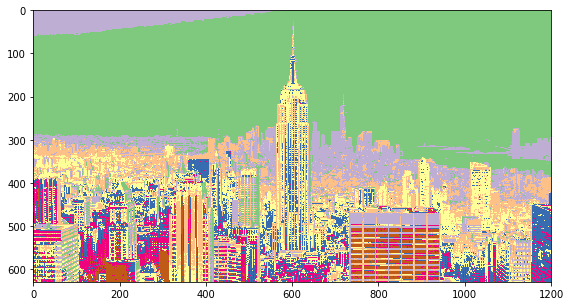

In [22]:
plt.figure(figsize=(10,5))
plt.imshow(mypic, cmap='Accent_r')


In [23]:
colormap_str = 'Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r'

colormap_l = colormap_str.split(',')
colormap_list = [ f.strip() for f in colormap_l]

#for cm in colormap_list:
#    plt.imshow(mypic, cmap=cm)

In [24]:
## downsample
im_lowres = cv2.pyrDown(imcv)

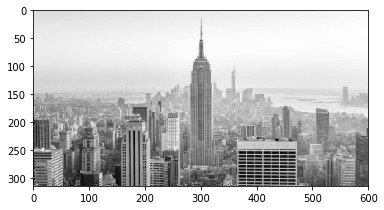

In [29]:
# conver to grayscale
gray_cv2 = cv2.cvtColor(im_lowres, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_cv2, cmap='gray')

In [26]:
print(cv2.__version__)

3.4.1
